This Notebook calculates the transient dynamics of both, the size and the population for a single colony

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import bayes_mvs as bayesest
from tqdm import tqdm

In [11]:
#Defining Functions you can increase the amount of subindexes for increasing the accuracy

sb=1 #Initial Size
def ev(u,t):#evolution algorithm
    du=np.zeros_like(u)
    #arg=mu*t
    for l in range(len(u)):
        for m in range(len(u[l])):
            for n in range(len(u[l,m])):
                for o in range(len(u[l,m,n])):
                    for p in range(len(u[l,m,n,o])):
                        for q in range(len(u[l,m,n,o,p])):

                            arg=mu*t
                            s=sb*np.exp(arg)
                            du[l,m,n,o,p,q]+=-k*l*s*u[l,m,n,o,p,q]*dt
                            arg=mu*t-np.log(2)
                            s=sb*np.exp(arg)
                            du[l,m,n,o,p,q]+=-k*m*s*u[l,m,n,o,p,q]*dt
                            arg=mu*t-2*np.log(2)
                            s=sb*np.exp(arg)
                            du[l,m,n,o,p,q]+=-k*n*s*u[l,m,n,o,p,q]*dt
                            arg=mu*t-3*np.log(2)
                            s=sb*np.exp(arg)
                            du[l,m,n,o,p,q]+=-k*o*s*u[l,m,n,o,p,q]*dt
                            arg=mu*t-4*np.log(2)
                            s=sb*np.exp(arg)
                            du[l,m,n,o,p,q]+=-k*p*s*u[l,m,n,o,p,q]*dt
                            arg=mu*t-5*np.log(2)
                            s=sb*np.exp(arg)
                            du[l,m,n,o,p,q]+=-k*q*s*u[l,m,n,o,p,q]*dt



                            arg=mu*t
                            s=sb*np.exp(arg)
                            if(l<len(u)-1 and m>1):
                                du[l,m,n,o,p,q]+=k*(l+1)*s*u[l+1,m-2,n,o,p,q]*dt
                            arg=mu*t-np.log(2)
                            s=sb*np.exp(arg)
                            if(m<len(u[l])-1 and n>1):
                                du[l,m,n,o,p,q]+=k*(m+1)*s*u[l,m+1,n-2,o,p,q]*dt
                            arg=mu*t-2*np.log(2)
                            s=sb*np.exp(arg)
                            if(n<len(u[l,m])-1 and o>1):
                                du[l,m,n,o,p,q]+=k*(n+1)*s*u[l,m,n+1,o-2,p,q]*dt
                            arg=mu*t-3*np.log(2)
                            s=sb*np.exp(arg)
                            if(o<len(u[l,m,n])-1 and p>1):
                                du[l,m,n,o,p,q]+=k*(o+1)*s*u[l,m,n,o+1,p-2,q]*dt
                            arg=mu*t-4*np.log(2)
                            s=sb*np.exp(arg)
                            if(p<len(u[l,m,n,o])-1 and q>1):
                                du[l,m,n,o,p,q]+=k*(p+1)*s*u[l,m,n,o,p+1,q-2]*dt
                            arg=mu*t-5*np.log(2)
                            s=sb*np.exp(arg)
                            if(q<len(u[l,m,n,o,p])-1):
                                du[l,m,n,o,p,q]+=k*(q+1)*s*u[l,m,n,o,p,q+1]*dt

                            
    return du

def meanpop(u):#Function for estimating the mean population from the vector of probabilities
    N=0
    for l in range(len(u)):
        for m in range(len(u[l])):
            for n in range(len(u[l,m])):
                for o in range(len(u[l,m,n])):
                    for p in range(len(u[l,m,n,o])):
                        for q in range(len(u[l,m,n,o,p])):
                            N+=(l+m+n+o+p+q)*u[l,m,n,o,p,q]
    return N

def varpop(u):#Estimation of the second order moment of the number of individuals
    var=0
    for l in range(len(u)):
        for m in range(len(u[l])):
            for n in range(len(u[l,m])):
                for o in range(len(u[l,m,n])):
                    for p in range(len(u[l,m,n,o])):
                        for q in range(len(u[l,m,n,o,p])):
                            var+=((l+m+n+o+p+q)**2)*u[l,m,n,o,p,q]
    return var


def meansg(u):#Estimating the mean size given the vector of probabilities
    N=meanpop(u)
    mn=0
    for l in range(len(u)):
        for m in range(len(u[l])):
            for n in range(len(u[l,m])):
                for o in range(len(u[l,m,n])):
                    for p in range(len(u[l,m,n,o])):
                        for q in range(len(u[l,m,n,o,p])): 
                            arg=mu*t
                            s=sb*np.exp(arg)
                            mn+=l*s*u[l,m,n,o,p,q]/N
                            arg=mu*t-np.log(2)
                            s=sb*np.exp(arg)
                            mn+=m*s*u[l,m,n,o,p,q]/N
                            arg=mu*t-2*np.log(2)
                            s=sb*np.exp(arg)
                            mn+=n*s*u[l,m,n,o,p,q]/N
                            arg=mu*t-3*np.log(2)
                            s=sb*np.exp(arg)
                            mn+=o*s*u[l,m,n,o,p,q]/N
                            arg=mu*t-4*np.log(2)
                            s=sb*np.exp(arg)
                            mn+=p*s*u[l,m,n,o,p,q]/N
                            arg=mu*t-5*np.log(2)
                            s=sb*np.exp(arg)
                            mn+=q*s*u[l,m,n,o,p,q]/N

    return mn

def varg(u,mn): #Variance of the size given the vector of probabilities
    N=meanpop(u)
    mn=0
    for l in range(len(u)):
        for m in range(len(u[l])):
            for n in range(len(u[l,m])):
                for o in range(len(u[l,m,n])):
                    for p in range(len(u[l,m,n,o])):
                        for q in range(len(u[l,m,n,o,p])):
                            arg=mu*t
                            s=sb*np.exp(arg)
                            mn+=l*(mn-s)**2*u[l,m,n,o,p,q]/N
                            arg=mu*t-np.log(2)
                            s=sb*np.exp(arg)
                            mn+=m*(mn-s)**2*u[l,m,n,o,p,q]/N
                            arg=mu*t-2*np.log(2)
                            s=sb*np.exp(arg)
                            mn+=n*(mn-s)**2*u[l,m,n,o,p,q]/N
                            arg=mu*t-3*np.log(2)
                            s=sb*np.exp(arg)
                            mn+=o*(mn-s)**2*u[l,m,n,o,p,q]/N
                            arg=mu*t-4*np.log(2)
                            s=sb*np.exp(arg)
                            mn+=p*(mn-s)**2*u[l,m,n,o,p,q]/N
                            arg=mu*t-5*np.log(2)
                            s=sb*np.exp(arg)
                            mn+=q*(mn-s)**2*u[l,m,n,o,p,q]/N

    return mn

def meanstree(u):
    mn=0
    for l in range(len(u)):
        for m in range(len(u[l])):
            for n in range(len(u[l,m])):
                for o in range(len(u[l,m,n])):
                    for p in range(len(u[l,m,n,o])):
                        for q in range(len(u[l,m,n,o,p])):
                            f=l+m+n+o+p+q
                            if f>0:
                                arg=mu*t
                                s=sb*np.exp(arg)
                                mn+=l*s*u[l,m,n,o,p,q]/f
                                arg=mu*t-np.log(2)
                                s=sb*np.exp(arg)
                                mn+=m*s*u[l,m,n,o,p,q]/f
                                arg=mu*t-2*np.log(2)
                                s=sb*np.exp(arg)
                                mn+=n*s*u[l,m,n,o,p,q]/f
                                arg=mu*t-3*np.log(2)
                                s=sb*np.exp(arg)
                                mn+=o*s*u[l,m,n,o,p,q]/f
                                arg=mu*t-4*np.log(2)
                                s=sb*np.exp(arg)
                                mn+=p*s*u[l,m,n,o,p,q]/f
                                arg=mu*t-5*np.log(2)
                                s=sb*np.exp(arg)
                                mn+=q*s*u[l,m,n,o,p,q]/f

    return mn

def varsz(u,mns):
    var=0
    for l in range(len(u)):
        for m in range(len(u[l])):
            for n in range(len(u[l,m])):
                for o in range(len(u[l,m,n])):
                    for p in range(len(u[l,m,n,o])):
                        for q in range(len(u[l,m,n,o,p])):
                            f=l+m+n+o+p+q
                            mnf=0
                            mnn=0
                            if f>0:
                                arg=mu*t
                                s=sb*np.exp(arg)
                                mnf+=l*(s**2)/f
                                mnn+=l*s/f
                                arg=mu*t-np.log(2)
                                s=sb*np.exp(arg)
                                mnf+=m*(s**2)/f
                                mnn+=m*s/f
                                arg=mu*t-2*np.log(2)
                                s=sb*np.exp(arg)
                                mnf+=n*(s**2)/f
                                mnn+=n*s/f
                                arg=mu*t-3*np.log(2)
                                s=sb*np.exp(arg)
                                mnf+=o*(s**2)/f
                                mnn+=o*s/f
                                arg=mu*t-4*np.log(2)
                                s=sb*np.exp(arg)
                                mnf+=p*(s**2)/f
                                mnn+=p*s/f
                                arg=mu*t-5*np.log(2)
                                s=sb*np.exp(arg)
                                mnf+=q*(s**2)/f
                                mnn+=q*s/f

                            if u[l,m,n,o,p,q]!=0:
                                var+=(mnf-mnn**2)*u[l,m,n,o,p,q]
    return var



In [62]:
sts=np.zeros([2,3,5,9,17,33])
sts[1,0,0,0,0,0]=1
t=0

mu=np.log(2)#Growth rate
k=np.log(2)#Division Rate
dt=0.025#timestep
meangb=[]
meantree=[]
vararraytree=[]
vararrayg=[]
timearray=[]
meanpoparray=[]
Narray=[]
varNarr=[]

while t<4:
    
    NN=meanpop(sts)
    Narray.append(NN)
    varNarr.append(varpop(sts)-NN**2)
    meandatg = meansg(sts)
    meandattree = meanstree(sts)
    vardatt = varsz(sts,meandattree)
    vardatg = varg(sts,meandatg)
    meantree.append(meandattree)
    meangb.append(meandatg)
    vararraytree.append(vardatt)
    vararrayg.append(vardatg)
    timearray.append(t)
    sts+=ev(sts,t)
    t+=dt
    #print(t)


In [64]:
df=pd.DataFrame({'Time':timearray,'MeanNumber': Narray, 'CV2Number':np.array(varNarr)/np.array(Narray)**2,
                'MeanSize':meantree, 'VarSize':vararraytree})
df.to_csv('./NumericStats.csv',index=False)

In [34]:
from PyEcoLib.PopSimulator import PopSimulator

meanbirthsize = 1 # mean size at birth  
gr=np.log(2) #Growth rate
tmax = 5  
sample_time = 0.01 #min 
div_steps = 1 #Division steps
ncells = 1000 #Number of colonies

v0=np.ones(ncells) #Array of initial sizes
sim = PopSimulator(ncells=ncells,gr = gr, sb=meanbirthsize, steps = div_steps,nu=2,V0array=v0) #Initializing the simulator
sim.szdyn(tmax = tmax, sample_time = 0.01, FileName=  "./dataPop.csv", DivEventsFile="./DivEventsPop.csv")


In [35]:
data=pd.read_csv('./dataPop.csv')
alldata=[]
for smp in data.Sample.unique():
    df=data[data.Sample==smp]
    for t in df.Time.unique():
        df2=df[df.Time==t]
        mn=np.mean(df2.Size)
        cv2=np.var(df2.Size)
        alldata.append([t,smp,mn,cv2])
df=pd.DataFrame(alldata,columns=['Time','Sample','MeanSize','CV2Size']) 

mn2p=[]
errormnn2p=[]
mnvarsim2p=[]
errorvarsim2p=[]

alldata=[]
for t in df.Time.unique():
    df2=df[df.Time==t]
    mean_cntr, var_cntr, std_cntr = bayesest(df2.MeanSize,alpha=0.95)
    mean_cntrv, var_cntrv, std_cntrv = bayesest(df2.CV2Size,alpha=0.95)
    alldata.append([t,mean_cntr[0],mean_cntr[1][1]-mean_cntr[0],mean_cntrv[0],mean_cntrv[1][1]-mean_cntrv[0]])
df=pd.DataFrame(alldata,columns=['Time','MeanSize','ErrorMean','VarSize','ErrorVar'])
df.to_csv('./SingleColony.csv',index=False)

C:\Users\cesar_nieto\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2098: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
C:\Users\cesar_nieto\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2099: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
C:\Users\cesar_nieto\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2098: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
C:\Users\cesar_nieto\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2099: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
C:\Users\cesar_nieto\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2098: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
C:\Users\cesar_nieto\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2099: RuntimeWarnin

Text(0.5, 0, 'Time')

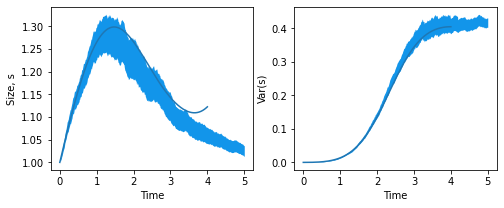

In [65]:
fig, ax = plt.subplots(1,2, figsize=(8,3))
data=pd.read_csv('./NumericStats.csv')
ax[0].plot(data.Time,data.MeanSize)
ax[1].plot(data.Time,data.VarSize)

data=pd.read_csv('./SingleColony.csv')

ax[0].fill_between(data.Time,data.MeanSize-data.ErrorMean,data.MeanSize+data.ErrorMean,
             alpha=1, edgecolor='#1295EA', facecolor='#1295EA',linewidth=0)

ax[1].fill_between(data.Time,data.VarSize-data.ErrorVar,data.VarSize+data.ErrorVar,
             alpha=1, edgecolor='#1295EA', facecolor='#1295EA',linewidth=0)
ax[0].set_ylabel('Size, s')
ax[1].set_ylabel('Var(s)')

ax[0].set_xlabel('Time')
ax[1].set_xlabel('Time')

#ax[1].plot(np.linspace(0,5,len(meantree)),vararraytree,lw=2,c='#096E00') 

In [57]:
data1=pd.read_csv('./dataPop.csv')
smparr=data1.Sample.unique()
smparr.sort()
dfN=pd.DataFrame(columns=['Sample','Time','N'])
for smp in smparr:
    df=data1[data1.Sample==smp]
    tm,N=np.unique(df['Time'],return_counts=True)
    df2=pd.DataFrame({'Sample':[smp]*len(N),'Time':tm,'N':N})
    dfN=pd.concat([dfN,df2])

mn22p=[]
mnn22p=[]
errormnn22p=[]
mnvarsim22p=[]
errorvarsim22p=[]
timearr22p=dfN.Time.unique()

for l in range(len(timearr22p)):
    df2=dfN[dfN.Time==timearr22p[l]]
    mean_cntr, var_cntr, std_cntr = bayesest(df2.N,alpha=0.95)
    mn22p.append(mean_cntr[0])
    errormnn22p.append(mean_cntr[1][1]-mean_cntr[0])
    errv=(var_cntr[1][1]-var_cntr[0])/mean_cntr[0]**2+2*(mean_cntr[1][1]-mean_cntr[0])*var_cntr[0]/mean_cntr[0]**3
    mnvarsim22p.append(np.var(df2.N)/np.mean(df2.N)**2)
    #print(mean_cntr[0],var_cntr[0],var_cntr[0]/mean_cntr[0]**2)
    errorvarsim22p.append(errv)

df2=pd.DataFrame({'Time':timearr22p,'MeanN':mn22p,'ErrorMn':errormnn22p,'CV2N':mnvarsim22p,'ErrorCV2':errorvarsim22p})
df2.to_csv('./NumberStatsSim.csv',index=False)

C:\Users\cesar_nieto\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2098: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
C:\Users\cesar_nieto\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2099: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


Text(0.5, 0, 'Time')

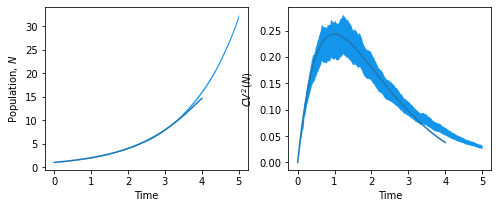

In [66]:
fig, ax = plt.subplots(1,2, figsize=(8,3))
data=pd.read_csv('./NumericStats.csv')
ax[0].plot(data.Time,data.MeanNumber)
ax[1].plot(data.Time,data.CV2Number)

data=pd.read_csv('./NumberStatsSim.csv')

ax[0].fill_between(data.Time,data.MeanN-data.ErrorMn,data.MeanN+data.ErrorMn,
             alpha=1, edgecolor='#1295EA', facecolor='#1295EA',linewidth=0)

ax[1].fill_between(data.Time,data.CV2N-data.ErrorCV2,data.CV2N+data.ErrorCV2,
             alpha=1, edgecolor='#1295EA', facecolor='#1295EA',linewidth=0)
ax[0].set_ylabel('Population, $N$')
ax[1].set_ylabel('$CV^2(N)$')

ax[0].set_xlabel('Time')
ax[1].set_xlabel('Time')